In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, f_classif

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir("../functions")
from feature import features_equal_mean, features_high_corr, features_chi2, binary_features, features_equal_var_mean
from plot import plot_proportion_target, labs , plot_ecdf, labs
os.chdir("../notebooks")

In [4]:
help(plot_proportion_target)

Help on function plot_proportion_target in module plot:

plot_proportion_target(data, target, col, ax, kwargs_labs={})



In [5]:
help(binary_features)

Help on function binary_features in module feature:

binary_features(data)



In [9]:
data = pd.read_csv('../data/preprocessed_data/Kaggle_Sirio_Libanes_ICU_Prediction.csv')

In [14]:
data_cont = data.select_dtypes('float64').drop(binary_features(data),axis=1, errors='ignore')

In [11]:
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
2,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
4,5,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,380,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
290,381,1,Above 90th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0-2,0
291,382,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
292,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0


## Análise variáveis categóricas

In [45]:
data['AGE_PERCENTIL'].unique()

array(['60th', '10th', '40th', '70th', '20th', '50th', '80th', '30th',
       '90th', 'Above 90th'], dtype=object)

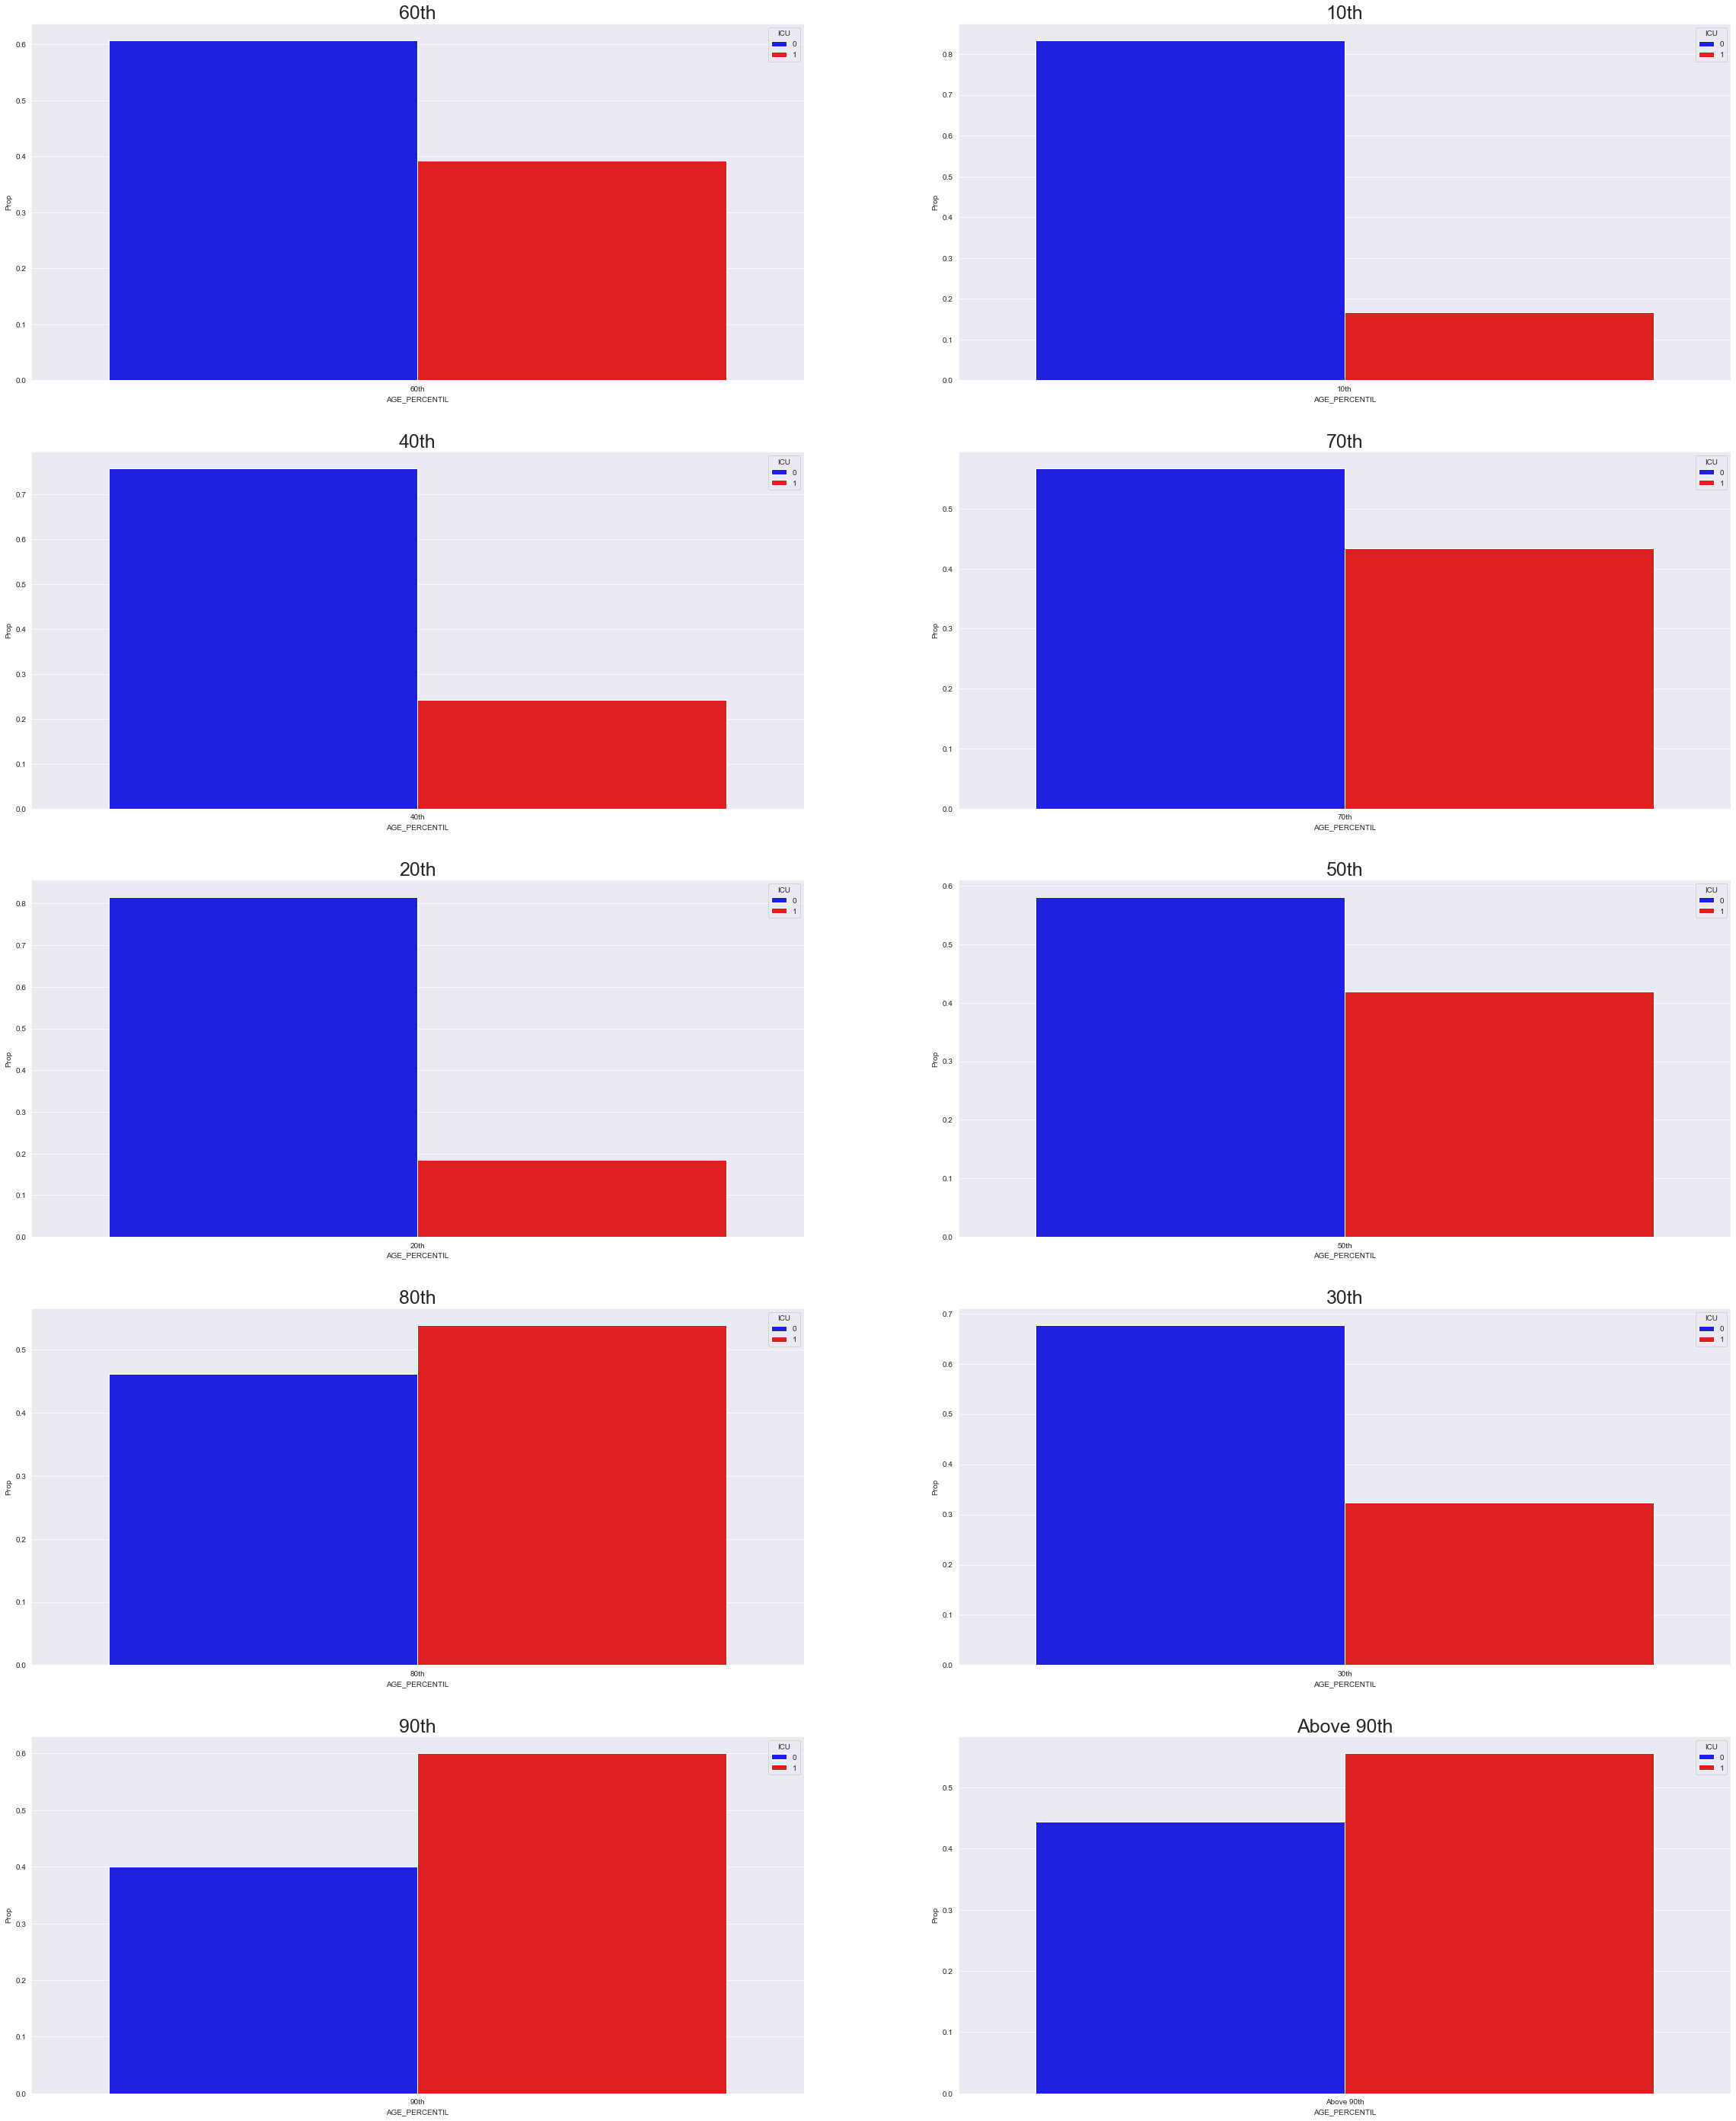

In [50]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(5,2,figsize=(40,50)) 
sns.set_palette(['blue','red'])
i=0
j=0
for percentil in data['AGE_PERCENTIL'].unique():
    tab = data.query('AGE_PERCENTIL == @percentil').groupby('AGE_PERCENTIL')['ICU'].value_counts(normalize=True)\
    .reset_index(name='Prop').sort_values('AGE_PERCENTIL').reset_index(drop=True)
    sns.barplot('AGE_PERCENTIL','Prop', data=tab, ax=ax[i,j], hue='ICU')
    plt.sca(ax[i,j])
    plt.title(percentil, fontsize=25)
    if j == 1:
        j = 0
        i += 1
    else:
        j+=1
plt.show()

## Análise das features binárias

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(6,2,figsize=(30,50)) 
sns.set_palette(['blue','red'])
i=0
j=0
for feature in binary_features(data.drop('ICU',axis=1)):
    plot_proportion_target(data, 'ICU', feature, ax[i,j], kwargs_labs={'title':f'{feature}'})
    if j == 1:
        j = 0
        i += 1
    else:
        j+=1

plt.delaxes(ax=ax[5,1])
plt.show()

In [ ]:
features_chi2(data, alpha=0.05)

In [ ]:
features_chi2(data, alpha=0.025)

## Análise de correção entre as variáveis

In [ ]:
coor = data.select_dtypes('float64').corr()
# Gerando a mascara para omitir a diagonal superior 
mask = np.triu(np.ones_like(coor, dtype=bool))

#Gerando a palheta de cores
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Criando o gráfico de calor
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (50,20))
    ax = sns.heatmap(coor, mask=mask, square=True, cmap=cmap, linewidths=.5)
    
#Mostrando o gráfico
plt.show()

In [ ]:
feat_high_corr = features_high_corr(data)

In [ ]:
print(feat_high_corr)

In [ ]:
data = data.drop(feat_high_corr, axis=1)

In [ ]:
data['RESPIRATORY_RATE_MEAN']

## Análise da Variância das features

In [ ]:
var = data.drop(binary_features(data), axis=1).drop('PATIENT_VISIT_IDENTIFIER', axis=1).var()
var = var.sort_values()
var.head()

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,10))
var.plot(kind='bar')
labs(ax, title='Variância das features', subtitle='VARIÂNCIA CALCULADA PARA CADA FEATURE', xlabel='Features', ylabel='Variância')
plt.show()

In [ ]:
with open('../features_drop_txt/var_equal_0.txt', 'w') as f:
    for feature in var[var==0].index:
        f.write(feature+'\n')

In [ ]:
data.drop(var[var==0].index,axis=1,inplace=True)

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(46,2, figsize=(20,150))

j=0

for column in data.select_dtypes('float64'):
    if len(data[column].unique()) == 2:
        pass
    else:
        xlim = [np.minimum(data.query('ICU == 0')[column].min(), data.query('ICU == 1')[column].min())-0.01, 
                np.maximum(data.query('ICU == 0')[column].max(), data.query('ICU == 1')[column].max())+0.01]
        plot_ecdf(data, column, 0, 'blue', ax[j,0],xlim=xlim)
        plot_ecdf(data, column, 1, 'red', ax[j,1],xlim=xlim)
        j+=1
fig.suptitle(y=0.89,t='ECDFs DAS FEATURES CONTÍNUAS', fontsize=25)
plt.show()

In [ ]:
eq_mean = features_equal_mean(data, write=False)
eq_mean

In [ ]:
data.drop(eq_mean, axis=1).columns

In [ ]:
data.drop(eq_mean, axis=1).columns

In [ ]:
data['RESPIRATORY_RATE_MEAN']

In [ ]:
eq_mean = features_equal_mean(data, alpha=0.1)
eq_mean

In [ ]:
data.drop(eq_mean, axis=1).columns

In [ ]:
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

In [ ]:
group_1_test = DescrStatsW(data.query('ICU == 0')['RESPIRATORY_RATE_MEAN'])
                
#Criando os teste do grupo 2
group_2_test = DescrStatsW(data.query('ICU == 1')['RESPIRATORY_RATE_MEAN'])

#Criando o teste de comparação das médias
test = CompareMeans(group_1_test, group_2_test)
                
#Obtendo o p_valor da Hipótese nula igual as médias serem iguais
p_value = test.ztest_ind()[1]

In [ ]:
test.ztest_ind()

In [ ]:
p_value

In [ ]:
from scipy.stats import levene

In [ ]:
levene(data.query('ICU == 0')['RESPIRATORY_RATE_MEAN'], data.query('ICU == 1')['RESPIRATORY_RATE_MEAN'])

In [ ]:
levene(data.query('ICU == 0')['PC02_ARTERIAL_MEDIAN'], data.query('ICU == 1')['PC02_ARTERIAL_MEDIAN'])

In [ ]:
from statsmodels.stats.oneway import equivalence_oneway

In [ ]:
equivalence_oneway([data.query('ICU == 0')['RESPIRATORY_RATE_MEAN'], data.query('ICU == 1')['RESPIRATORY_RATE_MEAN']],0, use_var='equal')